In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\modys\OneDrive\Desktop\Titanic ML-Course\archive\Training',
    target_size=(224, 224),  # adjust size as needed
    batch_size=32,
    class_mode='categorical' # or 'binary' for 2 classes
)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\modys\OneDrive\Desktop\Titanic ML-Course\archive\Testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print(train_generator.class_indices)

In [4]:
# Build CNN model for multiclass classification
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),

    Dense(train_generator.num_classes, activation="softmax")  # 4 classes
])

# Compile
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=5
)# here the epochs are set to 5 for quicker testing and hardware issues 
# the best accuracy achieved was 0.94 with 10 epochs , 10-20 is the best interval more than that caused overfiting as the data is small 
# Evaluate
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")


179/179 [==============================] - 142s 784ms/step - loss: 2.1954 - accuracy: 0.5798 - val_loss: 4.3145 - val_accuracy: 0.2471
Epoch 2/5
179/179 [==============================] - 141s 787ms/step - loss: 1.0104 - accuracy: 0.6162 - val_loss: 6.1214 - val_accuracy: 0.3051
Epoch 3/5
179/179 [==============================] - 130s 726ms/step - loss: 0.9661 - accuracy: 0.6068 - val_loss: 0.6265 - val_accuracy: 0.7490
Epoch 4/5
179/179 [==============================] - 122s 680ms/step - loss: 0.8312 - accuracy: 0.6418 - val_loss: 0.6169 - val_accuracy: 0.7414
Epoch 5/5
41/41 [==============================] - 7s 159ms/step - loss: 0.5725 - accuracy: 0.7483
Test Accuracy: 0.75


In [5]:
model.save("brain_tumor_cnn.keras")
print("Model saved as brain_tumor_cnn.keras")

Model saved as brain_tumor_cnn.keras


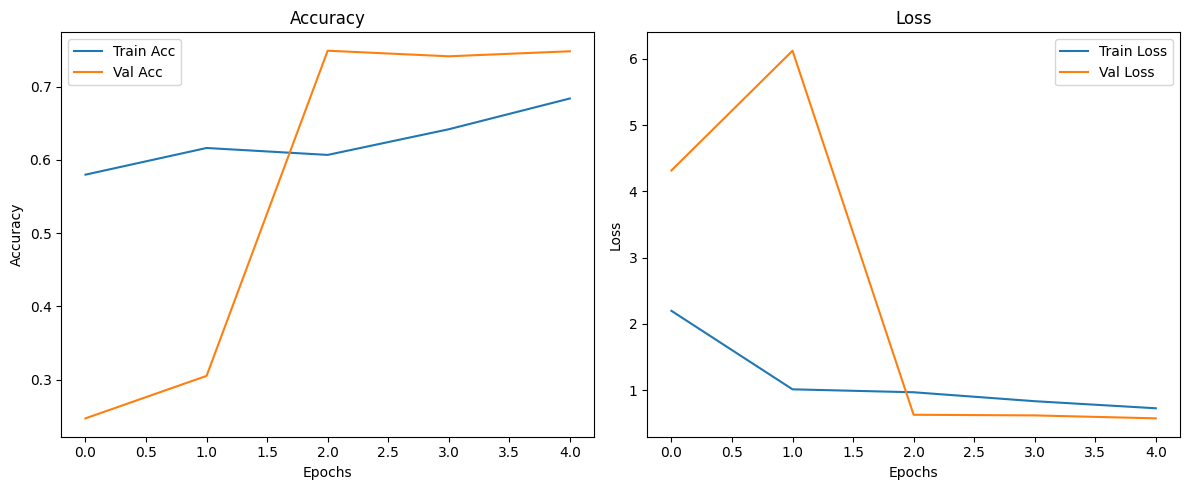

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("training_curves.png")
plt.show()